In [18]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#######.      loading attraction dataset   #########


import pandas as pd

# Load the attractions dataset using the correct path
attractions_df = pd.read_csv('/content/drive/My Drive/Attractions_20241001.csv')


In [20]:

attractions_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            56 non-null     object 
 1   LATITUDE        56 non-null     float64
 2   LONGITUDE       56 non-null     float64
 3   LOCATION        56 non-null     object 
 4   TYPE            56 non-null     object 
 5   Address         49 non-null     object 
 6   Quadrant        46 non-null     object 
 7   URL             46 non-null     object 
 8   POINT LOCATION  56 non-null     object 
dtypes: float64(2), object(7)
memory usage: 4.1+ KB


In [26]:
# Display the first few rows to confirm successful loading
attractions_df.head()

,NAME,LATITUDE,LONGITUDE,LOCATION,TYPE,Address,Quadrant,URL,POINT LOCATION
0,Castle Downs Recreation Centre,53.616036,-113.520919,"(53.61603608576531, -113.52091910876221)",Recreation Centre,11520 - 153 Avenue NW,NaN,NaN,POINT (-113.52091910876221 53.61603608576531)
1,Callingwood Recreation Centre,53.505290,-113.628025,"(53.505290074821886, -113.62802544430254)",Recreation Centre,"17740 69 Ave NW, Edmonton, AB T5T 6X3",NW,https://www.edmonton.ca/callingwoodtwinarenas/,POINT (-113.62802544430254 53.505290074821886)
2,Londonderry Fitness and Leisure Centre,53.607451,-113.444181,"(53.60745050475148, -113.44418142821127)",Recreation Centre,"14528 66 St NW, Edmonton, AB T5C 3R7",NE,https://www.edmonton.ca/londonderry/,POINT (-113.44418142821127 53.60745050475148)
3,Kinsmen Twin Arenas,53.451244,-113.513893,"(53.45124394828186, -113.51389274892732)",Arena,"1979 111 St NW, Edmonton, AB T6J 7C6",SW,https://www.edmonton.ca/kinsmentwinarenas/,POINT (-113.51389274892732 53.45124394828186)
4,Oliver Outdoor Swimming Pool,53.544975,-113.526329,"(53.54497536060087, -113.52632872596271)",Pool,"10315 119 St NW, Edmonton, AB T5K 1Z6",NE,https://www.edmonton.ca/oliverpool/,POINT (-113.52632872596271 53.54497536060087)


In [27]:
import pandas as pd

# Load the cleaned business dataset
open_restaurants_sorted = pd.read_csv('/content/drive/MyDrive/edmonton_cleaned_business.csv')

# Display the first few rows to confirm
print("Loaded cleaned business dataset:")
display(open_restaurants_sorted.head())


Loaded cleaned business dataset:


,business_id,name,latitude,longitude,stars,review_count,is_open,cuisine
0,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,53.544682,-113.506589,4.0,12,1,other
1,5BmQX4UVJY19mMtafMg7JA,Breadland Organic Whole Grain Bakery,53.547205,-113.522448,4.0,23,1,other
2,h_qlv6CIXGVurFOhFQ945w,Tim Hortons,53.559979,-113.616269,3.5,6,1,other
3,JfGfqCnk0-Tnf6PlahPUJQ,Burger Village,53.436403,-113.604288,4.0,10,1,american
4,JwBTq6IOFH97b9Hr6RT7pw,Reinette Café & Patisserie,53.522597,-113.619230,3.0,5,1,other


In [28]:
######.   feature engineering  techniques  ###############

###### creating the new column " higher_stars_near_attractions"


import pandas as pd
import numpy as np

# Load the attractions dataset
attractions_df = pd.read_csv('/content/drive/My Drive/Attractions_20241001.csv')

# Normalize column names
attractions_df.columns = [col.lower().strip() for col in attractions_df.columns]

# Check for missing values and fill or drop as needed
attractions_df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Define the Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of Earth in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# Set the desired radius (e.g., 1 kilometer)
radius = 1.0  # in kilometers


# Create a new column in the restaurants DataFrame to hold the attractions close to each restaurant
open_restaurants_sorted['nearby_attractions'] = open_restaurants_sorted.apply(
    lambda row: attractions_df[
        haversine(row['latitude'], row['longitude'], attractions_df['latitude'], attractions_df['longitude']) <= radius
    ]['name'].tolist(),
    axis=1
)

# Create a new column indicating whether the restaurant has higher stars if nearby attractions exist
open_restaurants_sorted['higher_stars_near_attractions'] = open_restaurants_sorted.apply(
    lambda row: row['stars'] > 3.5 if len(row['nearby_attractions']) > 0 else False,
    axis=1
)

# Display the first few rows of the DataFrame
print("Open Restaurants with Nearby Attractions and Higher Stars Indicator:")
display(open_restaurants_sorted[['name', 'stars', 'nearby_attractions', 'higher_stars_near_attractions']].tail(10))





Open Restaurants with Nearby Attractions and Higher Stars Indicator:


,name,stars,nearby_attractions,higher_stars_near_attractions
2075,Wok Box,3.0,[Downtown Community Arena],False
2076,Tony Roma's,2.5,"[Telus World of Science Edmonton, Peter Heming...",False
2077,Second Cup,4.0,[],False
2078,Pizza Unlimited & Fried Chicken,4.0,[],False
2079,Safeway,4.0,"[Confederation Arena, Confederation Leisure Ce...",True
2080,Chop Steakhouse & Bar,3.5,[Downtown Community Arena],False
2081,Second Cup Coffee Company,3.5,"[Oliver Outdoor Swimming Pool, Oliver Arena]",False
2082,Tokiwa Ramen,4.0,"[Oliver Outdoor Swimming Pool, Oliver Arena]",True
2083,AAA Chinese Restaurant & Lounge,3.0,[],False
2084,Japanese Village,3.0,[],False


In [29]:
# Filter for restaurants near attractions with higher stars
filtered_df = open_restaurants_sorted[open_restaurants_sorted['higher_stars_near_attractions'] == True]

# Display the filtered DataFrame to confirm it is created correctly
print("Filtered DataFrame with Higher Stars Near Attractions:")
display(filtered_df[['name', 'stars', 'nearby_attractions', 'higher_stars_near_attractions']].tail())

Filtered DataFrame with Higher Stars Near Attractions:


,name,stars,nearby_attractions,higher_stars_near_attractions
2067,Long & McQuade,4.5,"[Prince of Wales Armouries Heritage Centre, Do...",True
2069,The Cavern,4.5,[Downtown Community Arena],True
2071,Gong Cha Whyte ave,4.0,"[Scona Pool, Tipton Arena]",True
2079,Safeway,4.0,"[Confederation Arena, Confederation Leisure Ce...",True
2082,Tokiwa Ramen,4.0,"[Oliver Outdoor Swimming Pool, Oliver Arena]",True


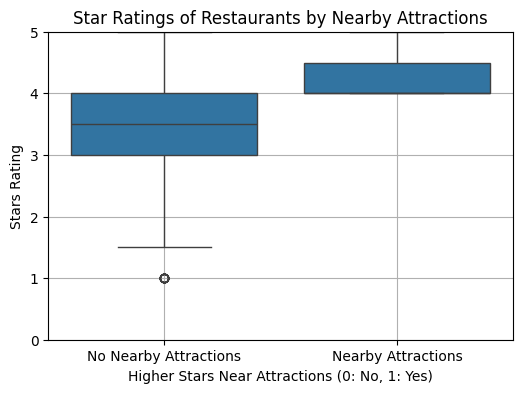

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='higher_stars_near_attractions', y='stars', data=open_restaurants_sorted)
plt.title('Star Ratings of Restaurants by Nearby Attractions')
plt.xlabel('Higher Stars Near Attractions (0: No, 1: Yes)')
plt.ylabel('Stars Rating')
plt.xticks([0, 1], ['No Nearby Attractions', 'Nearby Attractions'])
plt.ylim(0, 5)  # Assuming star ratings are between 0 and 5
plt.grid(True)
plt.show()

In [31]:
#### one-hot encoding is crucial for effectively utilizing categorical data in machine learning, allowing models to learn from and interpret these variables accurately.
##### This step enhances your dataset's readiness for analysis and predictive modeling, ultimately contributing to better insights and decision-making.
#################################################################



# Ensure filtered_df is defined and has data
if 'filtered_df' in locals() and not filtered_df.empty:
    # One-hot encoding for the 'cuisine' column
    one_hot_encoded_df = pd.get_dummies(filtered_df, columns=['cuisine'], prefix='cuisine', drop_first=True)

    # Select only columns related to cuisines
    cuisine_columns = [col for col in one_hot_encoded_df.columns if col.startswith('cuisine_')]
    cuisine_df = one_hot_encoded_df[cuisine_columns]

    # Display the shape and head of the cuisine DataFrame
    print("\nFiltered and One-Hot Encoded Cuisine DataFrame shape:", cuisine_df.shape)
    display(cuisine_df.head())
else:
    print("filtered_df is not defined or is empty. Please check the filtering step.")



Filtered and One-Hot Encoded Cuisine DataFrame shape: (490, 21)


,cuisine_brazilian,cuisine_cajun,cuisine_chinese,cuisine_ethiopian,cuisine_french,cuisine_greek,cuisine_halal,cuisine_indian,cuisine_italian,cuisine_japanese,...,cuisine_lebanese,cuisine_mexican,cuisine_other,cuisine_pizzeria,cuisine_seafood,cuisine_spanish,cuisine_thai,cuisine_turkish,cuisine_vegan,cuisine_vietnamese
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 1%
frequent_itemsets = apriori(cuisine_df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found
print("Frequent Itemsets:")
display(frequent_itemsets.head())

# Get the total number of itemsets
num_itemsets = frequent_itemsets.shape[0]

# Generate association rules from the frequent itemsets using the 'lift' metric
# and providing the 'num_itemsets' argument
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Sort the rules by confidence for better interpretation
rules_sorted = rules.sort_values(by='confidence', ascending=False)


Frequent Itemsets:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.053061,(cuisine_chinese)
1,0.020408,(cuisine_french)
2,0.012245,(cuisine_greek)
3,0.036735,(cuisine_indian)
4,0.053061,(cuisine_italian)


In [35]:
# Convert the boolean column to numeric (1 for True, 0 for False)
open_restaurants_sorted['higher_stars_near_attractions'] = open_restaurants_sorted['higher_stars_near_attractions'].astype(int)


# Calculate the Pearson correlation
correlation = open_restaurants_sorted[['stars', 'higher_stars_near_attractions']].corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(correlation)

# Extracting the correlation coefficient
pearson_coefficient = correlation.loc['stars', 'higher_stars_near_attractions']
print(f"\nPearson Correlation Coefficient between Stars and Higher Stars Near Attractions: {pearson_coefficient}")



Pearson Correlation Matrix:
                                  stars  higher_stars_near_attractions
stars                          1.000000                       0.473613
higher_stars_near_attractions  0.473613                       1.000000

Pearson Correlation Coefficient between Stars and Higher Stars Near Attractions: 0.473613101439895


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(open_restaurants_sorted['stars'], open_restaurants_sorted['higher_stars_near_attractions'])
print(f"Spearman Correlation Coefficient: {spearman_corr}")


Spearman Correlation Coefficient: 0.5259296675841234


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(open_restaurants_sorted['higher_stars_near_attractions'], open_restaurants_sorted['stars'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 737.4747075254791, p-value: 6.094530746276585e-154


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
####### Interpreting the Results:



###The combination of Pearson and Spearman correlations suggests a positive association between higher star ratings and nearby attractions, albeit not an extremely strong one.
#####The Chi-square test further confirms that the association between these variables is statistically significant.


In [ ]:
# Analyze the Elbow Plot: Look for the elbow point where inertia starts to level off.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Handle missing values in latitude and longitude
open_restaurants_sorted.dropna(subset=['latitude', 'longitude'], inplace=True)

# Select features for clustering (latitude and longitude)
features = open_restaurants_sorted[['latitude', 'longitude']]

# Elbow Method to find the optimal k
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Handle missing values in latitude and longitude
open_restaurants_sorted.dropna(subset=['latitude', 'longitude'], inplace=True)

# Select features for clustering (latitude and longitude)
features = open_restaurants_sorted[['latitude', 'longitude']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize KMeans for clustering with the optimal number of clusters
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit KMeans and predict clusters
open_restaurants_sorted['cluster'] = kmeans.fit_predict(features_scaled)

# Display the DataFrame with cluster labels
print("Open Restaurants with Cluster Labels:")
open_restaurants_sorted[['name', 'stars', 'cluster']].head()

# Plot the clusters
plt.figure(figsize=(8, 4))
plt.scatter(open_restaurants_sorted['longitude'], open_restaurants_sorted['latitude'],
            c=open_restaurants_sorted['cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Restaurants (k=6)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()




In [ ]:
# Summary of clusters
cluster_summary = open_restaurants_sorted.groupby('cluster').agg(
    average_stars=('stars', 'mean'),
    restaurant_count=('name', 'count'),
).reset_index()

# Display the cluster summary
print("\nCluster Summary:")
print(cluster_summary)

In [ ]:
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering (latitude and longitude)
features = open_restaurants_sorted[['latitude', 'longitude']]

# Initialize KMeans for clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
open_restaurants_sorted['cluster'] = kmeans.fit_predict(features)

# Define the labels for clusters based on star ratings and proximity assumptions
def label_clusters(row):
    if row['stars'] >= 4.0:
        return "Cluster 1: High-rated restaurants near major attractions"
    elif 3.0 <= row['stars'] < 4.0:
        return "Cluster 2: Moderate-rated restaurants located in suburban areas"
    elif 2.5 <= row['stars'] < 3.0:
        return "Cluster 3: Lower-rated restaurants that might be further from tourist hotspots"
    elif 2.0 <= row['stars'] < 2.5:
        return "Cluster 4: Restaurants with average ratings"
    elif 1.5 <= row['stars'] < 2.0:
        return "Cluster 5: Below average rated restaurants"
    else:
        return "Cluster 6: Low-rated restaurants that might be niche"

# Apply the labeling function to each restaurant
open_restaurants_sorted['cluster_label'] = open_restaurants_sorted.apply(label_clusters, axis=1)

# Create a color map for the clusters
cluster_colors = {
    "Cluster 1: High-rated restaurants near major attractions": 'green',
    "Cluster 2: Moderate-rated restaurants located in suburban areas": 'blue',
    "Cluster 3: Lower-rated restaurants that might be further from tourist hotspots": 'red',
    "Cluster 4: Restaurants with average ratings": 'orange',
    "Cluster 5: Below average rated restaurants": 'purple',
    "Cluster 6: Low-rated restaurants that might be niche": 'yellow'
}

# Create a base map centered around Edmonton
map_edmonton = folium.Map(location=[53.5444, -113.4909], zoom_start=12)

# Add restaurants to the map with different colors based on cluster label
for _, row in open_restaurants_sorted.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']} ({row['cluster_label']}) - Stars: {row['stars']}",
        icon=folium.Icon(color=cluster_colors[row['cluster_label']], icon='cutlery')
    ).add_to(map_edmonton)

# Add tourist attractions to the map from the attractions_df
for _, row in attractions_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='orange', icon='info-sign')
    ).add_to(map_edmonton)

# Save the map to an HTML file
map_edmonton.save('/content/drive/My Drive/edmonton_restaurants_clusters_map.html')

# Display the map (Note: this will work in a Jupyter environment)
map_edmonton


